In [1]:
!pip install tensorflow==2.0.0
import tensorflow as tf


ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.19.0rc0)
ERROR: No matching distribution found for tensorflow==2.0.0


In [3]:
x = tf.constant([[5, 2], [1, 3]])
print(x)

tf.Tensor(
[[5 2]
 [1 3]], shape=(2, 2), dtype=int32)


In [4]:
x.numpy()

array([[5, 2],
       [1, 3]], dtype=int32)

In [5]:
print('dtype:', x.dtype)
print('shape:', x.shape)

dtype: <dtype: 'int32'>
shape: (2, 2)


In [6]:
print(tf.ones(shape=(2, 1)))
print(tf.zeros(shape=(2, 1)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [7]:
tf.random.normal(shape=(2, 2), mean=0., stddev=1.)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.5966951 , -0.40484574],
       [ 0.22618505, -2.2896185 ]], dtype=float32)>

In [8]:
tf.random.uniform(shape=(2, 2), minval=0, maxval=10, dtype='int32')

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3, 6],
       [6, 7]], dtype=int32)>

In [9]:
print(tf.ones(shape=(2, 1)))
print(tf.zeros(shape=(2, 1)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [10]:
tf.random.normal(shape=(2, 2), mean=0., stddev=1.)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.19759472, -0.35876983],
       [ 2.7269857 ,  1.5095322 ]], dtype=float32)>

In [11]:
tf.random.uniform(shape=(2, 2), minval=0, maxval=10, dtype='int32')

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 5],
       [4, 7]], dtype=int32)>

In [12]:
initial_value = tf.random.normal(shape=(2, 2))
a = tf.Variable(initial_value)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.00243878,  0.7623457 ],
       [-1.1098063 , -0.4509947 ]], dtype=float32)>


In [13]:
new_value = tf.random.normal(shape=(2, 2))
a.assign(new_value)
for i in range(2):
  for j in range(2):
    assert a[i, j] == new_value[i, j]

In [14]:
added_value = tf.random.normal(shape=(2, 2))
a.assign_add(added_value)
for i in range(2):
  for j in range(2):
    assert a[i, j] == new_value[i, j] + added_value[i, j]

In [15]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

c = a + b
d = tf.square(c)
e = tf.exp(d)

In [17]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

with tf.GradientTape() as tape:
  tape.watch(a)
  c = tf.sqrt(tf.square(a) + tf.square(b))
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[ 0.8933982  -0.9382263 ]
 [-0.2691747   0.99470466]], shape=(2, 2), dtype=float32)


In [18]:
a = tf.Variable(a)

with tf.GradientTape() as tape:
  c = tf.sqrt(tf.square(a) + tf.square(b))
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[ 0.8933982  -0.9382263 ]
 [-0.2691747   0.99470466]], shape=(2, 2), dtype=float32)


In [19]:
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as tape:
    c = tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c, a)
  d2c_da2 = outer_tape.gradient(dc_da, a)
  print(d2c_da2)

tf.Tensor(
[[0.7098079  0.05464739]
 [0.8274203  0.03170085]], shape=(2, 2), dtype=float32)


In [20]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

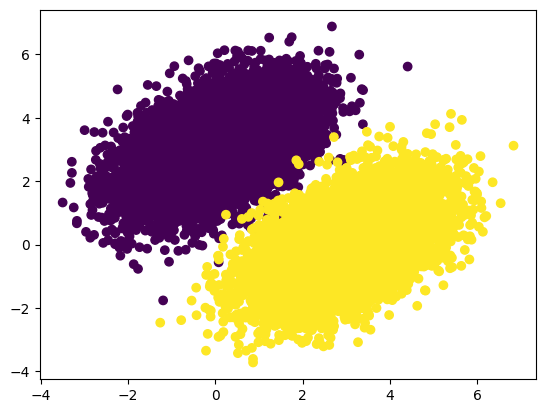

In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

In [22]:
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.0639
Epoch 1: last batch loss = 0.0498
Epoch 2: last batch loss = 0.0365
Epoch 3: last batch loss = 0.0375
Epoch 4: last batch loss = 0.0348
Epoch 5: last batch loss = 0.0337
Epoch 6: last batch loss = 0.0272
Epoch 7: last batch loss = 0.0178
Epoch 8: last batch loss = 0.0262
Epoch 9: last batch loss = 0.0162


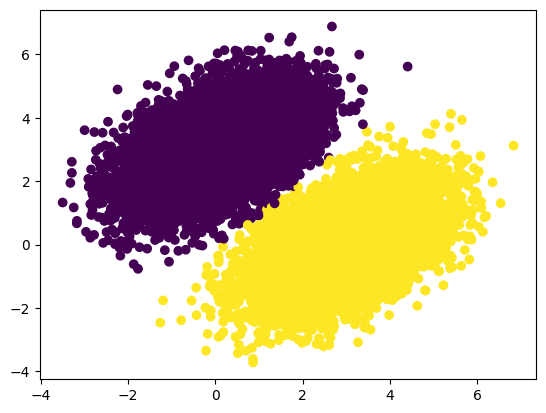

In [23]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)

In [24]:
import time

t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))


Time per epoch: 0.560 s


In [25]:
@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [26]:
t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))

Time per epoch: 0.172 s


In [27]:
from tensorflow.keras.layers import Layer

class Linear(Layer):
  """y = w.x + b"""

  def __init__(self, units=32, input_dim=32):
      super(Linear, self).__init__()
      w_init = tf.random_normal_initializer()
      self.w = tf.Variable(
          initial_value=w_init(shape=(input_dim, units), dtype='float32'),
          trainable=True)
      b_init = tf.zeros_initializer()
      self.b = tf.Variable(
          initial_value=b_init(shape=(units,), dtype='float32'),
          trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

# Instantiate our layer.
linear_layer = Linear(4, 2)

In [28]:
y = linear_layer(tf.ones((2, 2)))
assert y.shape == (2, 4)

In [34]:
class Linear(Layer):
  """y = w.x + b"""

  def __init__(self, units=32):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b


# Instantiate our lazy layer.
linear_layer = Linear(4)

# This will also call `build(input_shape)` and create the weights.
y = linear_layer(tf.ones((2, 2)))
assert len(linear_layer.weights) == 2

In [36]:
# Let's reuse the Linear class
# with a `build` method that we defined above.

class MLP(Layer):
    """Simple stack of Linear layers."""

    def __init__(self):
        super(MLP, self).__init__()
        self.linear_1 = Linear(32)
        self.linear_2 = Linear(32)
        self.linear_3 = Linear(10)

    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.linear_2(x)
        x = tf.nn.relu(x)
        return self.linear_3(x)

mlp = MLP()

# The first call to the `mlp` object will create the weights.
y = mlp(tf.ones(shape=(3, 64)))

# Weights are recursively tracked.
assert len(mlp.weights) == 6

In [37]:
from tensorflow.keras.layers import Layer

class Dropout(Layer):

  def __init__(self, rate):
    super(Dropout, self).__init__()
    self.rate = rate

  def call(self, inputs, training=None):
    if training:
      return tf.nn.dropout(inputs, rate=self.rate)
    return inputs

class MLPWithDropout(Layer):

  def __init__(self):
      super(MLPWithDropout, self).__init__()
      self.linear_1 = Linear(32)
      self.dropout = Dropout(0.5)
      self.linear_3 = Linear(10)

  def call(self, inputs, training=None):
      x = self.linear_1(inputs)
      x = tf.nn.relu(x)
      x = self.dropout(x, training=training)
      return self.linear_3(x)

mlp = MLPWithDropout()
y_train = mlp(tf.ones((2, 2)), training=True)
y_test = mlp(tf.ones((2, 2)), training=False)

In [38]:
inputs = tf.keras.Input(shape=(16,))


x = Linear(32)(inputs)
x = Dropout(0.5)(x)
outputs = Linear(10)(x)


model = tf.keras.Model(inputs, outputs)


assert len(model.weights) == 4

y = model(tf.ones((2, 16)))
assert y.shape == (2, 10)

In [39]:
from tensorflow.keras import Sequential

model = Sequential([Linear(32), Dropout(0.5), Linear(10)])

y = model(tf.ones((2, 16)))
assert y.shape == (2, 10)

In [40]:
bce = tf.keras.losses.BinaryCrossentropy()
y_true = [0., 0., 1., 1.]  # Targets
y_pred = [1., 1., 1., 0.]  # Predictions
loss = bce(y_true, y_pred)
print('Loss:', loss.numpy())

Loss: 12.000716


In [41]:
m = tf.keras.metrics.AUC()
m.update_state([0, 1, 1, 1], [0, 1, 0, 0])
print('Intermediate result:', m.result().numpy())

m.update_state([1, 1, 1, 1], [0, 1, 1, 0])
print('Final result:', m.result().numpy())

Intermediate result: 0.6666667
Final result: 0.71428573


In [42]:
class BinaryTruePositives(tf.keras.metrics.Metric):

  def __init__(self, name='binary_true_positives', **kwargs):
    super(BinaryTruePositives, self).__init__(name=name, **kwargs)
    self.true_positives = self.add_weight(name='tp', initializer='zeros')

  def update_state(self, y_true, y_pred, sample_weight=None):
    y_true = tf.cast(y_true, tf.bool)
    y_pred = tf.cast(y_pred, tf.bool)

    values = tf.logical_and(tf.equal(y_true, True), tf.equal(y_pred, True))
    values = tf.cast(values, self.dtype)
    if sample_weight is not None:
      sample_weight = tf.cast(sample_weight, self.dtype)
      values = tf.multiply(values, sample_weight)
    self.true_positives.assign_add(tf.reduce_sum(values))

  def result(self):
    return self.true_positives

  def reset_states(self):
    self.true_positive.assign(0)

m = BinaryTruePositives()
m.update_state([0, 1, 1, 1], [0, 1, 0, 0])
print('Intermediate result:', m.result().numpy())

m.update_state([1, 1, 1, 1], [0, 1, 1, 0])
print('Final result:', m.result().numpy())

Intermediate result: 1.0
Final result: 3.0


In [43]:
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:].reshape(60000, 784).astype('float32') / 255
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

optimizer = tf.keras.optimizers.Adam()

for step, (x, y) in enumerate(dataset):
  with tf.GradientTape() as tape:

    logits = model(x)

    loss_value = loss(y, logits)

  gradients = tape.gradient(loss_value, model.trainable_weights)

  optimizer.apply_gradients(zip(gradients, model.trainable_weights))

  accuracy.update_state(y, logits)

  # Logging.
  if step % 100 == 0:
    print('Step:', step)
    print('Loss from last step: %.3f' % loss_value)
    print('Total running accuracy so far: %.3f' % accuracy.result())

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Step: 0
Loss from last step: 2.334
Total running accuracy so far: 0.125
Step: 100
Loss from last step: 0.220
Total running accuracy so far: 0.836
Step: 200
Loss from last step: 0.174
Total running accuracy so far: 0.876
Step: 300
Loss from last step: 0.283
Total running accuracy so far: 0.897
Step: 400
Loss from last step: 0.069
Total running accuracy so far: 0.909
Step: 500
Loss from last step: 0.275
Total running accuracy so far: 0.916
Step: 600
Loss from last step: 0.217
Total running accuracy so far: 0.923
Step: 700
Loss from last step: 0.199
Total running accuracy so far: 0.928
Step: 800
Loss from last step: 0.087
Total running accuracy so far: 0.932
Step: 900
Loss from last step: 0.066
Total running accuracy so far: 0.935


In [44]:
x_test = x_test[:].reshape(10000, 784).astype('float32') / 255
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(128)

accuracy.reset_states()  # This clears the internal state of the metric

for step, (x, y) in enumerate(test_dataset):
  logits = model(x)
  accuracy.update_state(y, logits)

print('Final test accuracy: %.3f' % accuracy.result())

AttributeError: 'SparseCategoricalAccuracy' object has no attribute 'reset_states'

In [ ]:
from tensorflow.keras.layers import Layer

class ActivityRegularization(Layer):
  """Layer that creates an activity sparsity regularization loss."""

  def __init__(self, rate=1e-2):
    super(ActivityRegularization, self).__init__()
    self.rate = rate

  def call(self, inputs):

    self.add_loss(self.rate * tf.reduce_sum(tf.square(inputs)))
    return inputs

In [ ]:
from tensorflow.keras import layers

class SparseMLP(Layer):
  """Stack of Linear layers with a sparsity regularization loss."""

  def __init__(self, output_dim):
      super(SparseMLP, self).__init__()
      self.dense_1 = layers.Dense(32, activation=tf.nn.relu)
      self.regularization = ActivityRegularization(1e-2)
      self.dense_2 = layers.Dense(output_dim)

  def call(self, inputs):
      x = self.dense_1(inputs)
      x = self.regularization(x)
      return self.dense_2(x)


mlp = SparseMLP(1)
y = mlp(tf.ones((10, 10)))

print(mlp.losses)  # List containing one float32 scalar

In [ ]:
mlp = SparseMLP(1)
mlp(tf.ones((10, 10)))
assert len(mlp.losses) == 1
mlp(tf.ones((10, 10)))
assert len(mlp.losses) == 1


(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
dataset = tf.data.Dataset.from_tensor_slices(
    (x_train.reshape(60000, 784).astype('float32') / 255, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

mlp = SparseMLP(10)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

for step, (x, y) in enumerate(dataset):
  with tf.GradientTape() as tape:
    logits = mlp(x)

    loss = loss_fn(y, logits)

    loss += sum(mlp.losses)

    gradients = tape.gradient(loss, mlp.trainable_weights)

  optimizer.apply_gradients(zip(gradients, mlp.trainable_weights))

  if step % 100 == 0:
    print('Loss at step %d: %.3f' % (step, loss))

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

optimizer = tf.keras.optimizers.Adam()

In [45]:
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

In [46]:
model.fit(dataset, epochs=3)

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 0.0977 - sparse_categorical_accuracy: 0.9476
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0615 - sparse_categorical_accuracy: 0.9813
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0452 - sparse_categorical_accuracy: 0.9858


In [47]:
x_test = x_test[:].reshape(10000, 784).astype('float32') / 255
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(128)

loss, acc = model.evaluate(test_dataset)
print('loss: %.3f - acc: %.3f' % (loss, acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4154 - sparse_categorical_accuracy: 0.0910
loss: 2.415 - acc: 0.089


In [48]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255

num_val_samples = 10000
x_val = x_train[-num_val_samples:]
y_val = y_train[-num_val_samples:]
x_train = x_train[:-num_val_samples]
y_train = y_train[:-num_val_samples]

model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])
model.fit(x_train, y_train,
          validation_data=(x_val, y_val),
          epochs=3,
          batch_size=64)

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.4410 - sparse_categorical_accuracy: 0.8733 - val_loss: 0.1281 - val_sparse_categorical_accuracy: 0.9627
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0996 - sparse_categorical_accuracy: 0.9692 - val_loss: 0.0940 - val_sparse_categorical_accuracy: 0.9721
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0633 - sparse_categorical_accuracy: 0.9800 - val_loss: 0.0916 - val_sparse_categorical_accuracy: 0.9720


In [49]:
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])

callbacks = [tf.keras.callbacks.EarlyStopping(),
             tf.keras.callbacks.ModelCheckpoint(filepath='my_model.keras',
                                                save_best_only=True)]

model.fit(x_train, y_train,
          validation_data=(x_val, y_val),
          epochs=30,
          batch_size=64,
          callbacks=callbacks)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.4335 - sparse_categorical_accuracy: 0.8754 - val_loss: 0.1352 - val_sparse_categorical_accuracy: 0.9598
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0982 - sparse_categorical_accuracy: 0.9695 - val_loss: 0.0867 - val_sparse_categorical_accuracy: 0.9726
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0617 - sparse_categorical_accuracy: 0.9812 - val_loss: 0.1148 - val_sparse_categorical_accuracy: 0.9642
